> PROBLEMA DE NEGÓCIO:
- Aqui o objetivo é compreender a arquitetura e as características das ofertas no AirBnb
- **Dataset**: dataset2

## Instalando e Carregando os Pacotes

In [1]:
# Imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
dados = pd.read_csv("dados/dataset2.csv")

In [3]:
dados.shape

(3818, 92)

In [4]:
dados.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [7]:
# Como existem muitos dados, faremos um resumo contando os tipos dos dados
dados.dtypes.value_counts()

object     62
float64    17
int64      13
dtype: int64

In [6]:
# Exibindo a coluna 'price'
# Atenção ao formato do preço (possui '$')
dados.price.sample

<bound method NDFrame.sample of 0        $85.00
1       $150.00
2       $975.00
3       $100.00
4       $450.00
         ...   
3813    $359.00
3814     $79.00
3815     $93.00
3816     $99.00
3817     $87.00
Name: price, Length: 3818, dtype: object>

In [10]:
# Listando as colunas
dados.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

#### 01 - Violin Plot com a relação entre 'superhost' e 'média de avaliações

Essa viualização **não** é muito recomendada para quem não tem muito conhecimento técnico e que será um "expectador" da sua apresentação, pois é pouco intuitivo

Text(0, 0.5, 'Média de avaliação')

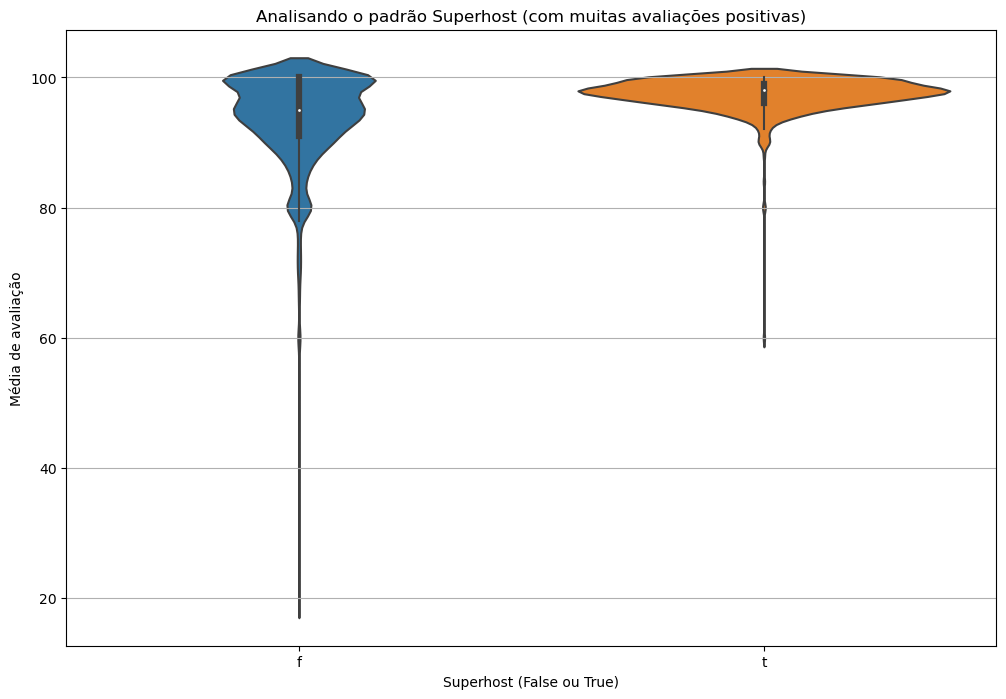

In [16]:
# Cópia do dataset (para não modificar os dados originais que são usados adiante)
df_copy1 = dados

# Formatação do gráfico
fontsize = 10
fig, axes = plt.subplots(figsize = (12,8))

# Construção do gráfico (com as 2 variáveis, dados e eixos)
sns.violinplot('host_is_superhost', 'review_scores_rating', data = df_copy1, ax = axes)

# Labels e title
axes.set_title('Analisando a média de avaliação Superhost (com muitas avaliações positivas)')
axes.yaxis.grid(True)
axes.set_xlabel('Superhost (False ou True)')
axes.set_ylabel('Média de avaliação')


> Neste gráfico entende-se que quem tem avaliação t(True) tem mais avaliações altas e a 'calda' menor, já quem tem f (False) é o contrário

#### 02 - Violin Plot com a relação entre 'superhost' e 'price

Será preciso fazer o tratamento da variável 'price' por conter caracteres especiais. Vamos substituir o '$', ',' e '%' por '' e convertê-lo para float

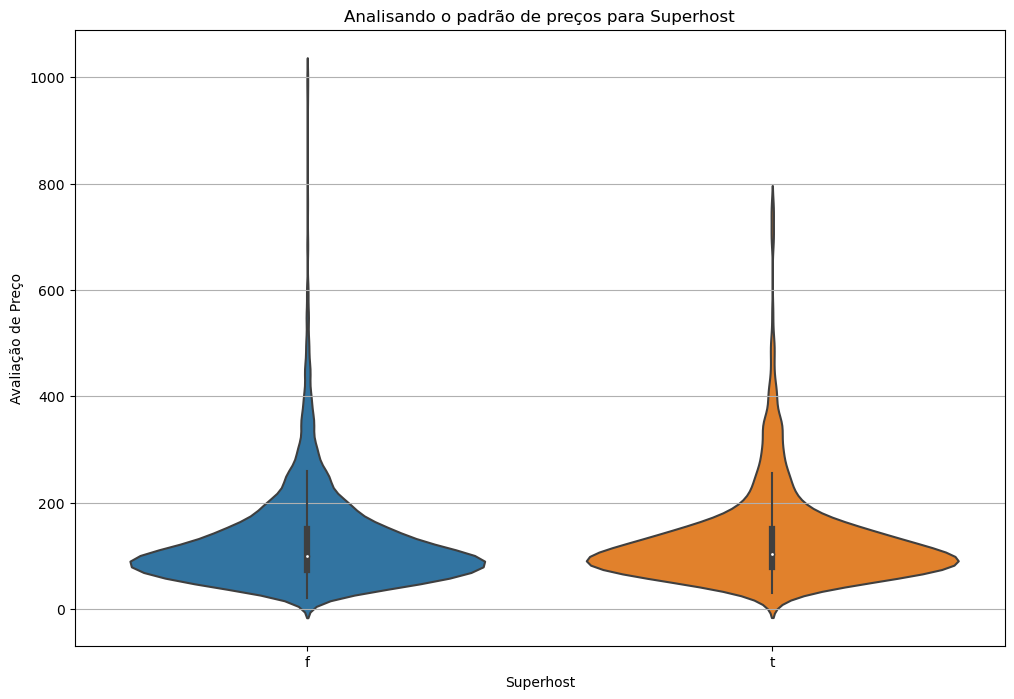

In [17]:
# Copiando o dataset
dados.price = dados.price.str.replace("$", "").str.replace(",", "").str.replace("%", "").astype('float64') 
df_copy2 = dados

# Formatando o gráfico
fontsize = 10
fig, axes = plt.subplots(figsize = (12,8))

# Construimos o gráfico
sns.violinplot('host_is_superhost', 'price', data = df_copy2, ax = axes)

# Labels e títulos
axes.set_title('Analisando o padrão de preços para Superhost')
axes.yaxis.grid(True)
axes.set_xlabel('Superhost')
axes.set_ylabel('Avaliação de Preço')

plt.show()

> Nota-se que pessoas que não são superhost chegam a ter preços até maiores que o os superhosts. Com isso pode-se concluir que é: ou fraude ou a casa é muito boa sendo anunciada pela primeira vez e ainda não é superhost.

#### 03 - Heatmap para matriz de correlação entre variáveis numéricas 

<AxesSubplot:>

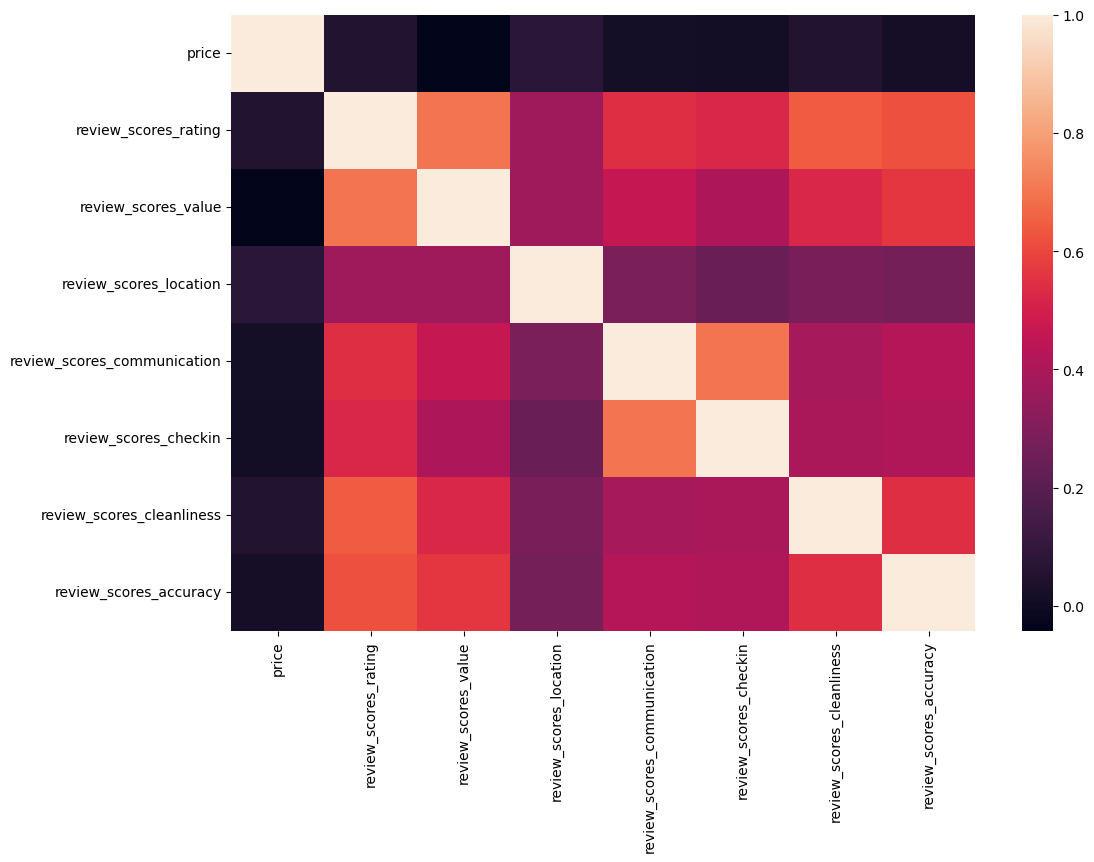

In [19]:
plt.figure(figsize = (12,8))

# Criamos um dataset com variáveis numéricas
df_copy3 = dados[['price',
             'review_scores_rating',
             'review_scores_value', 
             'review_scores_location', 
             'review_scores_communication', 
             'review_scores_checkin', 
             'review_scores_cleanliness', 
             'review_scores_accuracy']]

# Construímos o gráico e calculamos a correlação entre as variáveis
sns.heatmap(df_copy3.corr())

# Fim